In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from konlpy.tag import Okt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 전처리 파일 불러오기

In [3]:
file = 'C:/coding/multicampus/프로젝트_주간_3조/theroundup_daum.csv'
encoding='ansi'
rev = pd.read_csv(file, encoding=encoding)
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1330 non-null   int64 
 1   review  1330 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.9+ KB


In [4]:
rev.head()

,rating,review
0,10,오늘 나의 해방일지 프리퀄인 범죄도시2를 보고왔습니다.\n구씨가 왜 도랑을 뛰어넘고...
1,1,15세 영화라니. 정말 기가 막힙니다. 이제 수위가 사라졌나요. 사람은 보고 들은 ...
2,10,"오늘 봤는데, 액션과 유머가 적절히 섞인 재미난 영화 한편이었어요^^ 새로운 감독에..."
3,3,아무리 흥행을 위해서라지만 너무 잔인합니다. 왜 우리 한국 영화가 이리도 잔인하게...
4,9,속편은 별로다는 선입견으로 별 기대 안하고 봤는데 전편만큼 재미있네요. 오락 영화로 만족


In [5]:
rating_count = rev.groupby('rating').count()
rating_count = rating_count.reset_index()
rating_count

,rating,review
0,0,4
1,1,91
2,2,28
3,3,15
4,4,31
5,5,49
6,6,67
7,7,86
8,8,138
9,9,145


<function matplotlib.pyplot.show(close=None, block=None)>

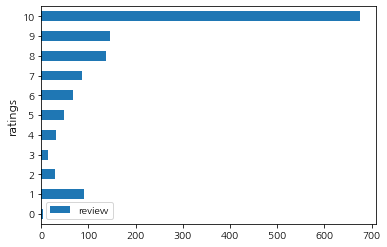

In [6]:
rating_count.plot(kind='barh', x='rating', y='review')
plt.ylabel("ratings", size=12)
plt.show

## 전처리 함수(수정)
> 스포일러 조건 & 손석구, 강해상 join하는 코드 추가

In [7]:
#토큰화
def token_konlpy(text, tagset):
    okt=Okt()
    words=[]
    for word in okt.pos(text):
        if (tagset == None) or (word[0] in '손 석 구 강 해 상 장 이 수') :
            words.append(word[0])
        else:
            if (len(word[0])>1) and (word[1] in tagset) :
                words.append(word[0])
    return words

#데이터 전처리
def review_preproces_ko(data, stop_words, tagset):
    data = str(data)
    if '스포일러가 포함된 감상평입니다. 감상평 보기' in data:
        data = data.replace('스포일러가 포함된 감상평입니다. 감상평 보기', '')
    line_text = re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", " ", data) # 한글 외 특수문자 제거

    words=token_konlpy(line_text, tagset)   # 토큰화
    
    if ('손' in words)or('석' in words)or('구' in words)or('강' in words)or('해' in words)or('상' in words)or('장' in words)or('이' in words)or('수' in words) :
        word_join = ' '.join(words)
        if '손 석 구도' in word_join :
            word_join = word_join.replace('손 석 구도', '손석구')
        elif '손 석 구의' in word_join :
            word_join = word_join.replace('손 석 구의', '손석구')
        elif '손 석 구도' in word_join :
            word_join = word_join.replace('손 석 구도', '손석구')
        elif '손 석 구씨' in word_join :
            word_join = word_join.replace('손 석 구씨', '손석구')
        elif '손 석 구가' in word_join :
            word_join = word_join.replace('손 석 구가', '손석구')
        elif '손 석 구만' in word_join :
            word_join = word_join.replace('손 석 구만', '손석구')
        elif '손 석 구' in word_join :
            word_join = word_join.replace('손 석 구', '손석구')
        elif '강해 상의' in word_join :
            word_join = word_join.replace('강해 상의', '강해상')
        elif '강해 상이' in word_join :
            word_join = word_join.replace('강해 상이', '강해상')
        elif '강 해상도' in word_join :
            word_join = word_join.replace('강 해상도', '강해상')
        elif '강 해상' in word_join :
            word_join = word_join.replace('강 해상', '강해상')
        elif '강 해 상'in word_join :
            word_join = word_join.replace('강 해 상', '강해상')
        elif '장 이 수도' in word_join :
            word_join = word_join.replace('장 이 수도', '장이수')
        elif '고장 이수' in word_join :
            word_join = word_join.replace('고장 이수', '장이수')
        elif '장 이수역' in word_join :
            word_join = word_join.replace('장 이수역', '장이수')
        elif '장 이 수의' in word_join :
            word_join = word_join.replace('장 이 수의', '장이수')
        elif '장 이수' in word_join :
            word_join = word_join.replace('장 이수', '장이수')
        elif '장 이 수' in word_join :
            word_join = word_join.replace('장 이 수', '장이수')
        else:
            pass
        words = word_join.split(' ')
    
    words = [w for w in words if not w in stop_words] #불용어 제거
    return words

# 불용어처리

In [8]:
# 불용어처리
pop_word = ['영화', '진짜', '역시', '그냥', '최고', '보기', '정말', '보고', '포함', '이후',
            '스포일러', '편도', '영화관', '정도', '편이', '장면', '느낌', '사람', '처음', '자체',
            '이수', '내내', '계속', '간만', '때문', '하나', '조금', '완전', '무조건', '만큼', 
            '이다', '다', '같다','던데', '기고', '나온다', '있다', '많다', '그래서', '그렇게', '아직', 
            '근데', '그래도', '어떻다', '딱', '이렇다', '같이', '함께', '물론','그만큼', '스럽다',  
            '그저', '누군지', '그걸', '특히', '아무리', '되게', '한동안', '뿐이다', '결국', '라면', 
            '첨','인하다', '오랜만', '이리', '히', '이미', '오래', '의하다', '이어서', '암튼', '아직도',
            '간간히', '탱', '우', '아무튼', '아무렇다', '푹푹', '팍팍', '앙', '후딱', '흑', '왠지', 
            '맨날', '어느', '희다', '아무래도', '으', '대놓고', '너무나', '빨리', '깜짝깜짝', '저렇게', 
            '쉽다', '넘치다', '역다', '성하다', '한테', '한번', '아무', '이제','뭐', '해도', '은', '는'
            '근래', '더욱', '보시', '그대로', '크게', '순간','이영화', '라서', '여서', '장', '이', 
            '다운',  '경우', '무비','세라', '가지', '덕분', '손', '석', '구', '강', '해', '상', '수']

f = open('c:/coding/multicampus/datas/한글 불용어.txt', 'r', encoding='utf8')
stop_words = f.read().splitlines()
[stop_words.append(stop) for stop in pop_word]
print(len(stop_words))

803


# 감정 분류 리스트 합침

In [11]:
positive_a = ['재밌다', '좋다', '시원하다', '통쾌하다', '미치다', '기대하다', '시원시원하다', '시원시원', 
            '많이', '그렇다', '강하다', '이렇게', '멋지다', '좋아하다', '완벽하다', '엄청나다', '쏠쏠하다',
            '솔직하다', '멋있다', '엄청', '즐겁다', '훨씬', '만족하다',  '강력하다', '치밀하다', '필요하다', 
            '높다', '유쾌하다', '괜찮다', '확실하다',   '야하다', '충분하다', '만족스럽다', '어마어마하다', 
            '비슷하다', '섹시하다', '화끈하다', '적절하다', '훌륭하다', '궁금하다', '색다르다', '장난없다',
            '빠르다', '탄탄하다', '새롭다', '깔끔하다', '쎄다',  '성공하다', '대단하다', '담백하다', '그나마', 
            '강렬하다', '적당하다', '귀엽다', '편하다', '짜릿하다', '못지않다',  '곱다', '딱이다', '꽉꽉',
            '굉장하다', '찰지다', '반하다', '후련하다', '신나다', '빵터지다', '화려하다', '알차다', '건강하다',
            '뛰어나다', '잘생기다', '신선하다', '자연스럽다', '행복하다', '반갑다', '상당하다', '조아', '충실하다', 
            '드디어', '너무나도', '유머러스하다', '다양하다', '당연하다', '맛있다', '착하다', '잘맞다', '드물다',
            '끝내주다', '언제나', '든든하다', '완전하다', '편안하다', '중요하다', '정확하다', '설레다', '놀래다', 
            '영리하다', '가득하다', '소소하다', '피식', '유일하다', '맛깔나다', '흥미롭다', '그립다', '첨으로', 
            '고맙다', '특별하다', '정말로', '잔잔하다', '신기하다', '개웃', '여전하다', '아주아주', '필요없다', 
            '풍부하다', '상쾌하다', '열심히', '매끄럽다', '사랑스럽다', '열광하다', '굳다', '진정하다', '의외로',
            '부탁드리다', '가능하다']

positive_nn = ['최고', '정말', '역시', '재미', '기대', '코믹', '웃음', '격감', '대박', '추천', '간만', '유머'
               , '매력', '존잼', '킬링타임', '강추', '명작', '재밋음', '만족', '감탄','짱짱','유쾌', '재밋어',
               '재미나', '재밋', '웃기', '빵빵',  '개꿀잼', '사이다', '시원', '통쾌',  '순삭', '진심', '쵝오',
               '굿굿', '최고다', '흥미진진', '화이팅', '만점', '케미', '상쾌', '졸잼', '압도', '박수',
               '레전드', '소름', '추앙']

negative_a = ['없다', '부족하다', '잔인하다', '아니다', '지루하다', '없이', '망하다', '실망하다', '답답하다', 
            '밉다', '어색하다', '힘들다', '안되다', '힘드다', '덜하다','나쁘다', '약하다', '똑같다', 
            '아깝다', '재미없다', '추하다', '아쉽다', '무섭다', '뻔하다', '유치하다', '단순하다', '짧다', '살벌하다',
            '낮다', '잔혹하다', '불편하다', '어설프다', '식상하다', '진부하다', '이상하다', '불쌍하다', '싫다', 
            '심하다', '괜히', '딱하다', '그만', '싫어하다', '시끄럽다', '실패하다', '안타깝다', '부실하다', 
            '빈약하다', '무리다', '비싸다', '안쓰럽다', '어쩌나', '섬뜩하다', '불필요하다', '차갑다', '징그럽다', 
            '어둡다', '맵다', '심각하다', '쓰리다', '마르다', '쓸데없이', '흠잡다', '어이없다', '무자비하다', 
            '끔찍하다', '평범하다', '쓸데없다', '복잡하다', '불안하다', '피곤하다', '억지스럽다', '흔하다', '작다',
            '길다', '부자연스럽다', '급하다', '우울하다', '안좋다', '심심하다', '짜증나다', '가볍다', '그럭저럭',
            '익숙하다', '힘드다']

negative_nn = ['지루함', '아쉬움', '억지', '실망', '별로']

positive = positive_a + positive_nn
negative = negative_a + negative_nn

# 전체 리뷰 sentiment 판단

In [13]:
#없음 None, 1개 str, 2개이상 list
tagset = None
col = 'review'
results =[]
for line in rev[col]: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words, tagset)
    results.append(result)

data = np.concatenate(results).tolist() #1차원 리스트로 축소

- 긍정단어 포함 +1
- 부정단어 포함 -1
- 아예 점수 부여 없다 == 0

In [14]:
rev_joins = []
for result in results:
    rev_join = ' '.join(result)
    rev_joins.append(rev_join)
rev_joins[0]

'오늘 해방일 지 프리퀄 인 범죄 도시 보고왔습니다 구씨 도랑 뛰어넘고 옷 위로 들어나는 뛰어난 피지 컬 가지고도 산포시 밭일 싱크대 하며 폐인 처럼 술 만 마시고 살 게 됐는지 잘 느껴지는 작품 이었습니다 보통 깡패 아니었던거 같았는데 프리퀄 다담 계 있네요 ㅎ 많은 분 구씨 프리퀄 꼭 감상 하시고 드라마 더 몰입 하실 있었으면 합니다 강추'

# 감정 분석 DataFrame 생성

In [17]:
clean_rev_df = pd.DataFrame({'ratings':rev['rating'], 'clean_reviews':rev_joins})
clean_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ratings        1330 non-null   int64 
 1   clean_reviews  1330 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.9+ KB


In [18]:
def sentiment_list(data_list):
    pos_count = []
    neg_count = []
    sentiment = []
    for clean_review in data_list:
        pos = 0
        neg = 0
        for p in positive:
            if p in clean_review:
                pos += 1
        for n in negative:
            if n in clean_review:
                neg += -1
        pos_count.append(pos)
        neg_count.append(neg)
        sentiment.append(pos+neg)
    return [pos_count, neg_count, sentiment]

In [19]:
sen_list = sentiment_list(clean_rev_df['clean_reviews'])

clean_rev_df['pos_count'] = sen_list[0]
clean_rev_df['neg_count'] = sen_list[1]
clean_rev_df['sentiment'] = sen_list[2]
clean_rev_df.head()

,ratings,clean_reviews,pos_count,neg_count,sentiment
0,10,오늘 해방일 지 프리퀄 인 범죄 도시 보고왔습니다 구씨 도랑 뛰어넘고 옷 위로 들어...,1,0,1
1,1,세 라니 기 막힙니다 수위 사라졌나요 들은 영향 받습니다 잔인한 즐기는지 인성 심각...,1,0,1
2,10,오늘 봤는데 액션 유머 적절히 섞인 재미 난 한편 이었어요 새로운 감독 대한 걱정 ...,4,0,4
3,3,흥행 위 해서 라지 만 너무 잔인합니다 한국 리도 잔인하게 연출 될까 요 재밌자고 ...,0,0,0
4,9,속편 별로 다는 선입견 별 기대 안 하고 봤는데 전편 재미있네요 오락 영화로 만족,3,-1,2


In [20]:
clean_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ratings        1330 non-null   int64 
 1   clean_reviews  1330 non-null   object
 2   pos_count      1330 non-null   int64 
 3   neg_count      1330 non-null   int64 
 4   sentiment      1330 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 52.1+ KB


In [21]:
clean_rev_df.groupby(['sentiment', 'pos_count', 'neg_count']).count() 

ratings  clean_reviews
sentiment pos_count neg_count                        
-2        0         -2               3              3
-1        0         -1              63             63
          1         -2               5              5
 0        0          0             650            650
          1         -1              33             33
          2         -2               3              3
 1        1          0             327            327
          2         -1              17             17
          3         -2               1              1
          4         -3               1              1
          5         -4               1              1
 2        2          0             135            135
          3         -1              10             10
          4         -2               2              2
 3        3          0              58             58
          4         -1               1              1
          5         -2               2              2
 4        4          0              11             11
          5         -1               1              1
 5        5          0               3              3
 6        6          0               1              1
 7        7          0               1              1
          9         -2               1              1